# Network Analysis in python (part 1)

#### Networks!

* Examples:
    * Social
    * Transportation
 
* Model relationships between entities

* Insights:
    * Important entities: influencers in social network
    * Pathfinding: most efficient transport path
    * Clustering: finding communities

In [1]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from([1, 2, 3])
G.nodes()

NodeView((1, 2, 3))

In [2]:
G.add_edge(1, 2)
G.edges()

EdgeView([(1, 2)])

In [3]:
G.node[1]['label'] = 'blue'
G.nodes(data=True)

NodeDataView({1: {'label': 'blue'}, 2: {}, 3: {}})

/Users/esousa/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


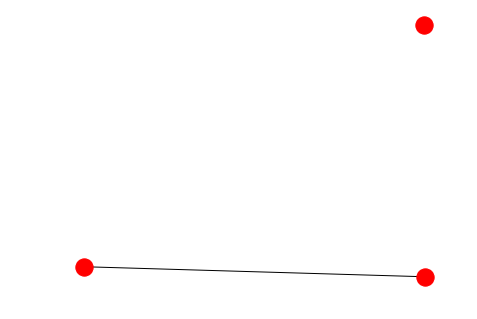

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

nx.draw(G)

#### Example: Queries on a graph

Now that you know some basic properties of the graph and have practiced using NetworkX's drawing facilities to visualize components of it, it's time to explore how you can query it for nodes and edges. Specifically, you're going to look for "nodes of interest" and "edges of interest". To achieve this, you'll make use of the .nodes() and .edges() methods that Eric went over in the video. The .nodes() method returns a list of nodes, while the .edges() method returns a list of tuples, in which each tuple shows the nodes that are present on that edge. Recall that passing in the keyword argument data=True in these methods retrieves the corresponding metadata associated with the nodes and edges as well.

You'll write list comprehensions to effectively build these queries in one line. For a refresher on list comprehensions, refer to Part 2 of DataCamp's Python Data Science Toolbox course. Here's the recipe for a list comprehension:

[ output expression __for__ iterator variable __in__ iterable __if__ predicate expression ].

You have to fill in the _iterable_ and the _predicate expression_. Feel free to prototype your answer by exploring the graph in the IPython Shell before submitting your solution.

```python
# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']

# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'] < date(2010, 1, 1)]
```

#### Types of graphs

* Undirected graphs (Facebook social graph)
    * O ----- O

In [5]:
type(G)

networkx.classes.graph.Graph

* Directed graphs (Directed: Twi er social graph)
    * O -----> O

In [6]:
D = nx.DiGraph()
type(D)

networkx.classes.digraph.DiGraph

* Multi(Di)Graph: Trip records between bike sharing stations
    * O =====> O

In [7]:
M = nx.MultiGraph()
type(M)

networkx.classes.multigraph.MultiGraph

In [8]:
MD = nx.MultiDiGraph()
type(MD)

networkx.classes.multidigraph.MultiDiGraph

__Edges can contain weights__

* Self-loops: Nodes that are connected to themselves

#### Example: Specifying a weight on edges

Weights can be added to edges in a graph, typically indicating the "strength" of an edge. In NetworkX, the weight is indicated by the 'weight' key in the metadata dictionary.

```python
# Set the 'weight' attribute of the edge between node 1 and 10 of T to be equal to 2
T.edge[1][10]['weight'] = 2

# Iterate over all the edges (with metadata)
# Set the weight of every edge involving node 293 to be equal to 1.1
for u, v, d in T.edges(data=True):

    # Check if node 293 is involved
    if 293 in [u, v]:
    
        # Set the weight to 1.1
        T.edge[u][v]['weight'] = 1.1
```

#### Example: Checking whether there are self-loops in the graph

NetworkX also allows edges that begin and end on the same node; while this would be non-intuitive for a social network graph, it is useful to model data such as trip networks, in which individuals begin at one location and end in another.

It is useful to check for this before proceeding with further analyses, and NetworkX graphs provide a method for this purpose: __.number_of_selfloops()__.

In this exercise as well as later ones, you'll find the __assert__ statement useful. An __assert__-ions checks whether the statement placed after it evaluates to True, otherwise it will return an AssertionError.

```python
# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []
    
    # Iterate over all the edges of G
    for u, v in G.edges():
    
    # Check if node u and node v are the same
        if u==v:
        
            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)
            
    return nodes_in_selfloops

# Check whether number of self loops equals the number of nodes in self loops
assert T.number_of_selfloops() == len(find_selfloop_nodes(T))
```

#### Visualizing networks

* Matrix plots
* Arc plots
* Circos plots

```python
import nxviz as nv
ap = nv.ArcPlot(G)
ap.draw()
```

#### Example: Visualizing using Matrix plots

It is time to try your first "fancy" graph visualization method: a matrix plot. To do this, __nxviz__ provides a __MatrixPlot__ object.

nxviz is a package for visualizing graphs in a rational fashion. Under the hood, the MatrixPlot utilizes __nx.to_numpy_matrix(G)__, which returns the matrix form of the graph. Here, each node is one column and one row, and an edge between the two nodes is indicated by the value 1. In doing so, however, only the _weight metadata is preserved_; all other metadata is lost, as you'll verify using an assert statement.

A corresponding __nx.from_numpy_matrix(A)__ allows one to quickly create a graph from a NumPy matrix. The default graph type is Graph(); if you want to make it a DiGraph(), that has to be specified using the create_using keyword argument, e.g. (__nx.from_numpy_matrix(A, create_using=nx.DiGraph)__).

```python
# Import nxviz
import nxviz as nv

# Create the MatrixPlot object: m
m = nv.MatrixPlot(T)

# Draw m to the screen
m.draw()

# Display the plot
plt.show()

# Convert T to a matrix format: A
A = nx.to_numpy_matrix(T)

# Convert A back to the NetworkX form as a directed graph: T_conv
T_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

# Check that the `category` metadata field is lost from each node
for n, d in T_conv.nodes(data=True):
    assert 'category' not in d.keys()
```

#### Example: Visualizing using Circos plots

Circos plots are a rational, non-cluttered way of visualizing graph data, in which nodes are ordered around the circumference in some fashion, and the edges are drawn within the circle that results, giving a beautiful as well as informative visualization about the structure of the network.

```python
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import CircosPlot

# Create the CircosPlot object: c
c = CircosPlot(T)

# Draw c to the screen
c.draw()

# Display the plot
plt.show()
```

#### Example: Visualizing using Arc plots

Following on what you've learned about the nxviz API, now try making an ArcPlot of the network. Two keyword arguments that you will try here are __node_order='keyX'__ and __node_color='keyX'__, in which you specify a key in the node metadata dictionary to color and order the nodes by.

```python
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import ArcPlot

# Create the un-customized ArcPlot object: a
a = ArcPlot(T)

# Draw a to the screen
a.draw()

# Display the plot
plt.show()

# Create the customized ArcPlot object: a2
a2 = ArcPlot(T,node_order='category', node_color='category')

# Draw a2 to the screen
a2.draw()

# Display the plot
plt.show()
```

## Degree Centrality

#### Important nodes

* Which nodes are important?
    * Degree centrality
    * Betweenness centrality
    
* Which center note might be important?

#### Degree centrality

(number of neighbors I have) / (number of neighbors I could possible have)

* Examples of nodes with degree centrality:
    * Twiter broadcasters
    * Airport transportation hubs
    * Disease super-spreaders

#### Number of neighbors
```python
G.edges()
    [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8),(1, 9)]

G.neighbors(1)
    [2, 3, 4, 5, 6, 7, 8, 9]

G.neighbors(8)
    [1]

G.neighbors(10)
......
NetworkXError: The node 10 is not in the graph.

nx.degree_centrality(G)
    {1: 1.0,
     2: 0.125,
     3: 0.125,
     4: 0.125,
     5: 0.125,
     6: 0.125,
     7: 0.125,
     8: 0.125,
     9: 0.125}
```

#### Example: Compute number of neighbors for each node

How do you evaluate whether a node is an important one or not? There are a few ways to do so, and here, you're going to look at one metric: the number of neighbors that a node has.

Every NetworkX graph G exposes a .neighbors(n) method that returns a list of nodes that are the neighbors of the node n.

```python
# Define nodes_with_m_nbrs()
def nodes_with_m_nbrs(G, m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()
    
    # Iterate over all nodes in G
    for n in G.nodes():
    
        # Check if the number of neighbors of n matches m
        if len(G.neighbors(n)) == m:
        
            # Add the node n to the set
            nodes.add(n)
            
    # Return the nodes with m neighbors
    return nodes

# Compute and print all nodes in T that have 6 neighbors
six_nbrs = nodes_with_m_nbrs(T, 6)
print(six_nbrs)
```

__The number of neighbors that a node has is called its "degree"__.

```python
# Compute the degree of every node: degrees
degrees = [len(T.neighbors(n)) for n in T.nodes()]

# Print the degrees
print(degrees)
```

#### Example: Degree centrality distribution

The degree centrality is the number of neighbors divided by all possible neighbors that it could have. Depending on whether self-loops are allowed, the set of possible neighbors a node could have could also include the node itself.

The nx.degree_centrality(G) function returns a dictionary, where the keys are the nodes and the values are their degree centrality values.

```python
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(T)

# Plot a histogram of the degree centrality distribution of the graph.
plt.figure()
plt.hist(list(deg_cent.values()))
plt.show()

# Plot a histogram of the degree distribution of the graph
plt.figure()
plt.hist(degrees)
plt.show()

# Plot a scatter plot of the centrality distribution and the degree distribution
plt.figure()
plt.scatter(degrees, list(deg_cent.values()))
plt.show()
```

#### Finding paths
* Pathfinding is important for
    * Optimization: e.g. shortest transport paths
    * Modeling: e.g. disease spread, information passing
* Algorithm: Breadth-first search

__Breadth-first search (BFS)__
* What is the shortest path between two nodes?

```python
G
    <networkx.classes.graph.Graph at 0x10cc08828>
    
len(G.edges())
    57
    
len(G.nodes())
    20
    
G.neighbors(1)
    [10, 5, 14, 7]
    
G.neighbors(10)
    [1, 19, 5, 17, 8, 9, 13, 14]
```

#### Example: Shortest Path 

You can leverage what you know about finding neighbors to try finding paths in a network. One algorithm for path-finding between two nodes is the "breadth-first search" (BFS) algorithm. In a BFS algorithm, you start from a particular node and iteratively search through its neighbors and neighbors' neighbors until you find the destination node.

Pathfinding algorithms are important because they provide another way of assessing node importance.

```python
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    
    # Initialize the queue of cells to visit with the first node: queue
    queue = [node1]
    
    # Iterate over the nodes in the queue
    for node in queue:
    
        # Get neighbors of the node
        neighbors = G.neighbors(node) 
        
        # Check to see if the destination node is in the set of neighbors
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break
        
        else:
            # Add current node to visited nodes
            visited_nodes.add(node)
            
            # Add neighbors of current node that have not yet been visited
            queue.extend([n for n in neighbors if n not in visited_nodes])
       
       # Check to see if the final element of the queue has been reached
       if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False
```

### Betweenness centrality

* All shortest paths
    * Set of paths
    * Each path is shortest path between a given pair of nodes
    * Done for all node pairs
    
#### Betweenness centrality

(number of shortest paths through node) / (all possible shortest paths)

* Application:
    * Bridges between liberal and conservative leaning Twitter users
    * Critical information transfer links
    
```python
G = nx.barbell_graph(m1=5, m2=1)
nx.betweenness_centrality(G)
    {0: 0.0,
     1: 0.0,
     2: 0.0,
     3: 0.0,
     4: 0.5333333333333333,
     5: 0.5555555555555556,
     6: 0.5333333333333333,
     7: 0.0,
     8: 0.0,
     9: 0.0,
     10: 0.0}
```

#### Example: NetworkX betweenness centrality on a social network

Betweenness centrality is a node importance metric that uses information about the shortest paths in a network. It is defined as the fraction of all possible shortest paths between any pair of nodes that pass through the node.

NetworkX provides the nx.betweenness_centrality(G) function for computing the betweenness centrality of every node in a graph, and it returns a dictionary where the keys are the nodes and the values are their betweenness centrality measures.

```python
# Compute the betweenness centrality of T: bet_cen
bet_cen = nx.betweenness_centrality(T)

# Compute the degree centrality of T: deg_cen
deg_cen = nx.degree_centrality(T)

# Create a scatter plot of betweenness centrality and degree centrality
plt.scatter(list(bet_cen.values()), list(deg_cen.values()))

# Display the plot
plt.show()
```

#### Example: Deep dive - Twitter network

You're going to now take a deep dive into a Twitter network, which will help reinforce what you've learned earlier. First, you're going to find the nodes that can broadcast messages very efficiently to lots of people one degree of separation away.

```python
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)
    
    # Compute the maximum degree centrality: max_dc
    max_dc = max(list(deg_cent.values()))
    
    nodes = set()
    
    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():
    
        # Check if the current value has the maximum degree centrality
        if v == max_dc:
        
            # Add the current node to the set of nodes
            nodes.add(k)
            
    return nodes
    
# Find the node(s) that has the highest degree centrality in T: top_dc
top_dc = find_nodes_with_highest_deg_cent(T)
print(top_dc)

# Write the assertion statement
for node in top_dc:
    assert nx.degree_centrality(T)[node] == max(nx.degree_centrality(T).values())
```


_An analogous deep dive can be done on betweenness centrality._

## Cliques & communities

* Cliques
    * Social cliques: tightly-knit groups
    * Network cliques: completely connected graphs
    * Simplest complex clique: a triangle
    * Triangle applications: Friend recommendation systems
    
```python
G
    <networkx.classes.graph.Graph at 0x10c99ecf8>
    
from itertools import combinations
for n1, n2 in combinations(G.nodes(), 2):
print(n1, n2)
```

#### Identifying triangle relationships

Now that you've learned about cliques, it's time to try leveraging what you know to find structures in a network. Triangles are what you'll go for first. We may be interested in triangles because they're the simplest complex clique. Let's write a few functions; these exercises will bring you through the fundamental logic behind network algorithms.

In the Twitter network, each node has an 'occupation' label associated with it, in which the Twitter user's work occupation is divided into celebrity, politician and scientist. One potential application of triangle-finding algorithms is to find out whether users that have similar occupations are more likely to be in a clique with one another.

```python

from itertools import combinations

# Define is_in_triangle() 
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not. 
    
    Returns a boolean.
    """
    in_triangle = False
    
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    
        # Check if an edge exists between n1 and n2
        if G.has_edge(n1, n2):
            in_triangle = True
            break
    return in_triangle
    
```

#### Finding nodes involved in triangles

NetworkX provides an API for counting the number of triangles that every node is involved in: nx.triangles(G). It returns a dictionary of nodes as the keys and number of triangles as the values.

```python

from itertools import combinations

# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])
    
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    
        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1, n2):
        
            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)
            
            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)
            
    return triangle_nodes
    
# Write the assertion statement
assert len(nodes_in_triangle(T, 1)) == 35
```

#### Finding open triangles

Let us now move on to finding open triangles! Recall that they form the basis of friend recommendation systems; if "A" knows "B" and "A" knows "C", then it's probable that "B" also knows "C".

```python

from itertools import combinations

# Define node_in_open_triangle()
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False
    
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    
        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1, n2):
        
            in_open_triangle = True
            
            break
            
    return in_open_triangle

# Compute the number of open triangles in T
num_open_triangles = 0

# Iterate over all the nodes in T
for n in T.nodes():

    # Check if the current node is in an open triangle
    if node_in_open_triangle(T,n):
    
        # Increment num_open_triangles
        num_open_triangles += 1
        
print(num_open_triangles)
```

### Maximal cliques

* __Definition__: a clique that, when extended by one node is no longer a clique
* __Applications__: community finding

In [9]:
G = nx.barbell_graph(m1=5, m2=1)
nx.find_cliques(G)

<generator object find_cliques at 0xa25be9408>

In [10]:
list(nx.find_cliques(G))

[[4, 0, 1, 2, 3], [4, 5], [6, 5], [6, 7, 8, 9, 10]]

#### Finding all maximal cliques of size "n"

NetworkX provides a function that allows you to identify the nodes involved in each maximal clique in a graph: nx.find_cliques(G).

Write a function maximal_cliques() that has two parameters - G and size - and finds all maximal cliques of size n.

```python
# Define maximal_cliques()
def maximal_cliques(G, size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in list(nx.find_cliques(G)):
        if len(clique) == size:
            mcs.append(clique)
    return mcs

# Check that there are 33 maximal cliques of size 3 in the graph T
assert len(maximal_cliques(T, 3)) == 33
```

### Subgraphs

* Visualize portions of a large graph
* Paths
* Communities/cliques
* Degrees of separation from a node

In [11]:
G = nx.erdos_renyi_graph(n=20, p=0.2)
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19))

In [12]:
nodes = G.neighbors(8)
nodes

In [13]:
G_eight = G.subgraph(nodes)
G_eight.edges()

EdgeView([(0, 15), (0, 17)])

In [14]:
G_eight

In [15]:
G

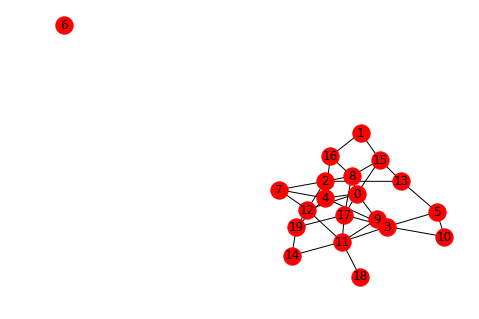

In [16]:
nx.draw(G, with_labels=True)

#### Subgraphs I

There may be times when you just want to analyze a subset of nodes in a network. To do so, you can copy them out into another graph object using G.subgraph(nodes), which returns a new graph object (of the same type as the original graph) that is comprised of the iterable of nodes that was passed in.

Write a function __get_nodes_and_nbrs(G, nodes_of_interest)__ that extracts the subgraph from graph G comprised of the nodes_of_interest and their neighbors.

```python

nodes_of_interest = [29, 38, 42]

# Define get_nodes_and_nbrs()
def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []
    
    # Iterate over the nodes of interest
    for n in nodes_of_interest:
    
        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)
        
        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):
        
            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)
            
    return G.subgraph(nodes_to_draw)

# Extract the subgraph with the nodes of interest: T_draw
T_draw = get_nodes_and_nbrs(T, nodes_of_interest)

# Draw the subgraph to the screen
nx.draw(T_draw, with_labels=True)
plt.show()
```

#### Subgraphs II

Let's try one more exercise in which you extract nodes that have a particular metadata property and their neighbors. This should hark back to what you've learned about using list comprehensions to find nodes.

1. Using a list comprehension, extract nodes that have the metadata _'occupation'_ as _'celebrity'_ alongside their neighbors.

2. Place them in a new subgraph called __T_sub__

3. Draw __T_sub__ to the screen.

```python
# Extract the nodes of interest: nodes
nodes = [n for n, d in T.nodes(data=True) if d['occupation'] == 'celebrity']

# Create the set of nodes: nodeset
nodeset = set(nodes)

# Iterate over nodes
for n in nodes:

    # Compute the neighbors of n: nbrs
    nbrs = T.neighbors(n)
    
    # Compute the union of nodeset and nbrs: nodeset
    nodeset = nodeset.union(nbrs)

# Compute the subgraph using nodeset: T_sub
T_sub = T.subgraph(nodeset)

# Draw T_sub to the screen
nx.draw(T_sub, with_labels=True)
plt.show()
```

In [17]:
G = nx.erdos_renyi_graph(n=20, p=0.2)
len(G.edges())

42

In [18]:
len(G.nodes())

20

(array([2., 2., 0., 4., 0., 3., 2., 0., 5., 2.]),
 array([0.05263158, 0.08421053, 0.11578947, 0.14736842, 0.17894737,
        0.21052632, 0.24210526, 0.27368421, 0.30526316, 0.33684211,
        0.36842105]),
 <a list of 10 Patch objects>)

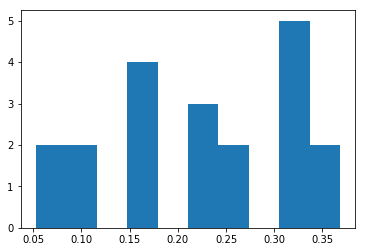

In [19]:
plt.hist(list(nx.degree_centrality(G).values()))

(array([7., 4., 1., 2., 3., 1., 0., 1., 0., 1.]),
 array([0.        , 0.0239042 , 0.04780841, 0.07171261, 0.09561682,
        0.11952102, 0.14342523, 0.16732943, 0.19123364, 0.21513784,
        0.23904205]),
 <a list of 10 Patch objects>)

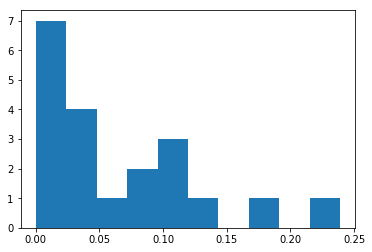

In [20]:
plt.hist(list(nx.betweenness_centrality(G).values()))

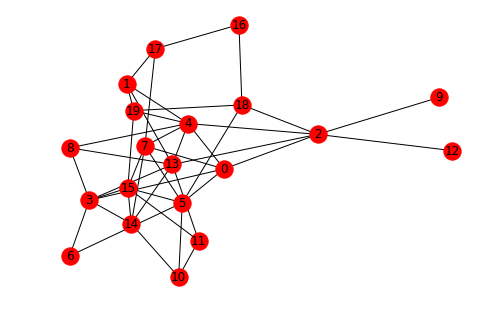

In [21]:
nx.draw(G, with_labels=True)

In [24]:
import nxviz as nv

In [25]:
G = nx.erdos_renyi_graph(n=20, p=0.3)

In [26]:
help(nv.CircosPlot)

Help on class CircosPlot in module nxviz.plots:

class CircosPlot(BasePlot)
 |  CircosPlot(graph, **kwargs)
 |  
 |  Plotting object for CircosPlot.
 |  
 |  Accepts the following additional arguments apart from the ones in
 |  `BasePlot`:
 |  
 |  :param node_label_layout: which/whether (a) node layout is used,
 |      either 'rotation', 'numbers' or None
 |  :type node_label_layout: `string`
 |  
 |  Method resolution order:
 |      CircosPlot
 |      BasePlot
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, graph, **kwargs)
 |      Create the CircosPlot.
 |  
 |  compute_group_label_positions(self)
 |      Computes the x,y positions of the group labels.
 |  
 |  compute_node_label_positions(self)
 |      Uses the get_cartesian function to compute the positions of each node
 |      label in the Circos plot.
 |      
 |      This method is always called after the compute_node_positions
 |      method, so that the plot_radius is pre-computed.
 |      This 

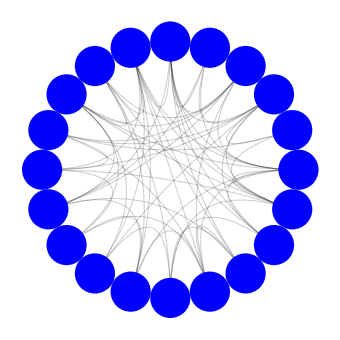

In [27]:
circ = nv.CircosPlot(G)
circ.draw()

In [28]:
G = nx.erdos_renyi_graph(n=100, p=0.03)

In [29]:
nx.connected_component_subgraphs(G)

<generator object connected_component_subgraphs at 0x1a2892ea98>

In [30]:
list(nx.connected_component_subgraphs(G))

In [31]:
for g in list(nx.connected_component_subgraphs(G)):
    print(len(g.nodes()))

99
1


#### MatrixPlot

Make a MatrixPlot visualization of the largest connected component subgraph, with authors grouped by their user group number.

```python
# Import necessary modules
from nxviz import MatrixPlot
import matplotlib.pyplot as plt

# Calculate the largest connected component subgraph: largest_ccs
largest_ccs = sorted(nx.connected_component_subgraphs(G), key=lambda x: len(x))[-1]

# Create the customized MatrixPlot object: h
h = MatrixPlot(graph=largest_ccs, node_grouping='grouping')

# Draw the MatrixPlot to the screen
h.draw()
plt.show()
```

#### ArcPlot

Make an ArcPlot of the GitHub collaboration network, with authors sorted by degree.

```python
# Import necessary modules
from nxviz.plots import ArcPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes in G, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G,n)
    
# Create the ArcPlot object: a
a = ArcPlot(graph=G, node_order='degree')

# Draw the ArcPlot to the screen
a.draw()
plt.show()
```

#### CircosPlot

Make a CircosPlot of the network, again, with GitHub users sorted by their degree, and grouped and coloured by their __'grouping'__ key. 

```python
# Import necessary modules
from nxviz import CircosPlot
import matplotlib.pyplot as plt 
 
# Iterate over all the nodes, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G,n)

# Create the CircosPlot object: c
c = CircosPlot(G, node_order='degree', node_grouping='grouping', node_color='grouping')

# Draw the CircosPlot object to the screen
c.draw()
plt.show()
```

#### Finding cliques

Find the author(s) that are part of the largest maximal clique, and plot the subgraph of that/one of those clique(s) using a CircosPlot.

```python
# Import necessary modules
import networkx as nx
from nxviz import CircosPlot
import matplotlib.pyplot as plt

# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(G), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_lc
G_lc = G.subgraph(largest_clique)

# Create the CircosPlot object: c
c = CircosPlot(G_lc)

# Draw the CircosPlot to the screen
c.draw()
plt.show()
```

#### Finding important collaborators

Here, we'll make use of the _degree_centrality()_ and _betweenness_centrality()_ functions in NetworkX to compute each of the respective centrality scores, and then use that information to find the "important nodes". In other words, your job in this exercise is to find the user(s) that have collaborated with the most number of users.

```python
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(G)

# Compute the maximum degree centrality: max_dc
max_dc = max(deg_cent.values())

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)
```

#### Characterizing editing communities

1. Go out 1 degree of separation from the clique, and add those users to the subgraph
2. Record each node's degree centrality score in its node metadata
3. Visualize this network with an ArcPlot sorting the nodes by degree centrality

```python
# Import necessary modules
from nxviz import ArcPlot
import matplotlib.pyplot as plt
 
# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(G), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: G_lmc
G_lmc = G.subgraph(largest_max_clique)

# Go out 1 degree of separation
for node in G_lmc.nodes():
    G_lmc.add_nodes_from(G.neighbors(node))
    G_lmc.add_edges_from(zip([node]*len(G.neighbors(node)), G.neighbors(node)))

# Record each node's degree centrality score
for n in G_lmc.nodes():
    G_lmc.node[n]['degree centrality'] = nx.degree_centrality(G_lmc)[n]
        
# Create the ArcPlot object: a
a = ArcPlot(G_lmc, node_order='degree centrality')

# Draw the ArcPlot to the screen
a.draw()
plt.show()
```

#### Recommending co-editors who have yet to edit together

Finally, you're going to leverage the concept of open triangles to recommend users on GitHub to collaborate!

1. Compile a list of GitHub users that should be recommended to collaborate with one another.
2. Using a list comprehension, identify the top 10 pairs of users that should be recommended to collaborate.

```python
# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in G.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    
        # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):
        
            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)
```